## 讀檔案，載入資料

In [2]:
import json
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return {item['cuisine_id']: item for item in json.load(f)}

gt_file = 'ground_truth.json'
gpt_file = 'response_gpt.json'
gemini_file = 'response_gemini.json'
claude_file = 'response_claude.json'

gt_data = load_json(gt_file)
gpt_data = load_json(gpt_file)
gemini_data = load_json(gemini_file)
claude_data = load_json(claude_file)

print(gt_data)
print(gpt_data)
print(gemini_data)
print(claude_data)

{1: {'cuisine_id': 1, 'cuisine_url': 'https://icook.tw/recipes/455986', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '五花肉', 'amount': '2000', 'unit': '克'}, {'ingredient': '洋蔥', 'amount': '2', 'unit': '顆'}, {'ingredient': '紅蔥頭末', 'amount': '50', 'unit': '克'}, {'ingredient': '蒜末', 'amount': '50', 'unit': '克'}, {'ingredient': '五香粉', 'amount': '1', 'unit': '小匙'}, {'ingredient': '醬油', 'amount': '1', 'unit': '杯'}, {'ingredient': '油膏', 'amount': '0.5', 'unit': '杯'}, {'ingredient': '紹興酒', 'amount': '4', 'unit': '大匙'}, {'ingredient': '冰糖', 'amount': '50', 'unit': '克'}], 'cooking_instructions': '洋蔥切絲或丁。五花肉切細條。大蒜壓成泥或切末。紅蔥頭可以用紅蔥酥代替。先放部分的肉下鍋煎出油來。肉取出備用。將砂糖或冰糖下鍋，用煎肉的油炒至咖啡色。大約深金黃色就可以先熄火了。加入醬油，油膏。加入蒜泥、五香粉、洋蔥與加入紹興酒拌勻同煮，沒有紹興也可以加米酒。加入所有的五花肉拌炒均勻。加入800ml的水。開大火煮滾，改中小火煮兩個小時。', 'quantity': 10}, 2: {'cuisine_id': 2, 'cuisine_url': 'https://icook.tw/recipes/391516', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '豬五花肉', 'amount': '1000', 'unit': '克'}, {'ingredient': '蒜頭', 'amount': '3', 'unit': '

## 資料整理

### ingredients 變成 sentence 

In [3]:
# {id:" ", ing:" "}
gt_ing_sentence_dic = {}
gpt_ing_sentence_dic = {}
gemini_ing_sentence_dic = {}
claude_ing_sentence_dic = {}

def ingredients_to_sentence (data):
    ing_sentence = {}
    for item in data:
        sentence = ""
        for ingredient_list in data[item]['ingredients']:
            sentence = sentence + ingredient_list['ingredient'] + ' '
        ing_sentence[item] = sentence
    return ing_sentence

gt_ing_sentence_dic = ingredients_to_sentence(gt_data)
gpt_ing_sentence_dic = ingredients_to_sentence(gpt_data)
gemini_ing_sentence_dic = ingredients_to_sentence(gemini_data)
claude_ing_sentence_dic = ingredients_to_sentence(claude_data)

### Instruction 變成 sentence

In [4]:
# {id:" ", instrc:" "}
gt_instrc_sentence_dic = {}
gpt_instrc_sentence_dic = {}
gemini_instrc_sentence_dic = {}
claude_instrc_sentence_dic = {}

def instructions_to_sentence (data):
    print(data)
    instrc_sentence = {}
    for item in data:
        print(data[item]['cooking_instructions'])
        instrc_sentence[item] = data[item]['cooking_instructions']
    return instrc_sentence

gt_instrc_sentence_dic = instructions_to_sentence(gt_data)
gpt_instrc_sentence_dic = instructions_to_sentence(gpt_data)
gemini_instrc_sentence_dic = instructions_to_sentence(gemini_data)
claude_instrc_sentence_dic = instructions_to_sentence(claude_data)


{1: {'cuisine_id': 1, 'cuisine_url': 'https://icook.tw/recipes/455986', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '五花肉', 'amount': '2000', 'unit': '克'}, {'ingredient': '洋蔥', 'amount': '2', 'unit': '顆'}, {'ingredient': '紅蔥頭末', 'amount': '50', 'unit': '克'}, {'ingredient': '蒜末', 'amount': '50', 'unit': '克'}, {'ingredient': '五香粉', 'amount': '1', 'unit': '小匙'}, {'ingredient': '醬油', 'amount': '1', 'unit': '杯'}, {'ingredient': '油膏', 'amount': '0.5', 'unit': '杯'}, {'ingredient': '紹興酒', 'amount': '4', 'unit': '大匙'}, {'ingredient': '冰糖', 'amount': '50', 'unit': '克'}], 'cooking_instructions': '洋蔥切絲或丁。五花肉切細條。大蒜壓成泥或切末。紅蔥頭可以用紅蔥酥代替。先放部分的肉下鍋煎出油來。肉取出備用。將砂糖或冰糖下鍋，用煎肉的油炒至咖啡色。大約深金黃色就可以先熄火了。加入醬油，油膏。加入蒜泥、五香粉、洋蔥與加入紹興酒拌勻同煮，沒有紹興也可以加米酒。加入所有的五花肉拌炒均勻。加入800ml的水。開大火煮滾，改中小火煮兩個小時。', 'quantity': 10}, 2: {'cuisine_id': 2, 'cuisine_url': 'https://icook.tw/recipes/391516', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '豬五花肉', 'amount': '1000', 'unit': '克'}, {'ingredient': '蒜頭', 'amount': '3', 'unit': '

## 食材種類正確性

### ROUGE

In [5]:
! pip install rouge jieba

In [6]:
from rouge import Rouge
import jieba

In [7]:
gpt_ing_rouge = []
gemini_ing_rouge = []
claude_ing_rouge = []

def preprocess_text(text):
    words = jieba.lcut(text)
    processed_text = ' '.join(words)
    return processed_text

def rouge_for_ing_sentence(gt_ing_sentence, model_ing_sentence):
    processed_gt = preprocess_text(gt_ing_sentence)
    processed_model = preprocess_text(model_ing_sentence)
    print(processed_gt)
    print(processed_model)
    rouge = Rouge()
    scores = rouge.get_scores(processed_gt, processed_model)
    print(scores)
    return scores
    
def get_ing_rouge(gt_ing_sentence_dic, model_ing_sentence_dic):
    ing_rouge = []
    for gt_id, model_id in zip(gt_ing_sentence_dic, model_ing_sentence_dic):
        sentence1 = gt_ing_sentence_dic[gt_id]
        sentence2 = model_ing_sentence_dic[model_id]
        print(sentence1)
        print(sentence2)
        ing_rouge.append(rouge_for_ing_sentence(sentence1, sentence2))
        print(rouge_for_ing_sentence(sentence1, sentence2))
    return ing_rouge

gpt_ing_rouge = get_ing_rouge(gt_ing_sentence_dic, gpt_ing_sentence_dic)
gemini_ing_rouge = get_ing_rouge(gt_ing_sentence_dic, gemini_ing_sentence_dic)
claude_ing_rouge = get_ing_rouge(gt_ing_sentence_dic, claude_ing_sentence_dic)

print(f'gpt_ing_rouge = {gpt_ing_rouge}')
print(f'gemini_ing_rouge = {gemini_ing_rouge}')
print(f'claude_ing_rouge = {claude_ing_rouge}')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/f_/vxylhfq155l_3pjs9xvn54d80000gn/T/jieba.cache


五花肉 洋蔥 紅蔥頭末 蒜末 五香粉 醬油 油膏 紹興酒 冰糖 
五花肉 紅蔥頭 蒜頭 醬油 米酒 冰糖 白胡椒粉 水 滷蛋（可選） 白飯 


Loading model cost 0.870 seconds.
Prefix dict has been built successfully.


五花肉   洋蔥   紅蔥頭 末   蒜末   五香粉   醬油   油膏   紹興酒   冰糖  
五花肉   紅蔥頭   蒜頭   醬油   米酒   冰糖   白 胡椒粉   水   滷 蛋 （ 可選 ）   白飯  
[{'rouge-1': {'r': 0.26666666666666666, 'p': 0.4, 'f': 0.31999999520000005}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.26666666666666666, 'p': 0.4, 'f': 0.31999999520000005}}]
五花肉   洋蔥   紅蔥頭 末   蒜末   五香粉   醬油   油膏   紹興酒   冰糖  
五花肉   紅蔥頭   蒜頭   醬油   米酒   冰糖   白 胡椒粉   水   滷 蛋 （ 可選 ）   白飯  
[{'rouge-1': {'r': 0.26666666666666666, 'p': 0.4, 'f': 0.31999999520000005}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.26666666666666666, 'p': 0.4, 'f': 0.31999999520000005}}]
[{'rouge-1': {'r': 0.26666666666666666, 'p': 0.4, 'f': 0.31999999520000005}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.26666666666666666, 'p': 0.4, 'f': 0.31999999520000005}}]
豬五花肉 蒜頭 米酒 冰糖 五香粉 香葉 紅蔥頭 醬油 黑糖 白胡椒粉 八角 
五花肉 紅蔥頭 蒜頭 醬油 冰糖 米酒 水 五香粉 白胡椒粉 滷蛋 小黃瓜 白飯 
豬 五花肉   蒜頭   米酒   冰糖   五香粉   香葉   紅蔥頭   醬油   黑糖   白 胡椒粉   八角  
五花肉   紅蔥頭   蒜頭   醬油   冰糖   米酒   水   五香粉  

In [8]:
gpt_ing_rouge_1 = []
gpt_ing_rouge_2 = []
gpt_ing_rouge_L = []

for items in gpt_ing_rouge:
    for item in items:
        print(item)
        gpt_ing_rouge_1.append(item['rouge-1']['f'])
        gpt_ing_rouge_2.append(item['rouge-2']['f'])
        gpt_ing_rouge_L.append(item['rouge-l']['f'])


gemini_ing_rouge_1 = []
gemini_ing_rouge_2 = []
gemini_ing_rouge_L = []

for items in gemini_ing_rouge:
    for item in items:
        print(item)
        gemini_ing_rouge_1.append(item['rouge-1']['f'])
        gemini_ing_rouge_2.append(item['rouge-2']['f'])
        gemini_ing_rouge_L.append(item['rouge-l']['f'])

claude_ing_rouge_1 = []
claude_ing_rouge_2 = []
claude_ing_rouge_L = []

for items in claude_ing_rouge:
    for item in items:
        print(item)
        claude_ing_rouge_1.append(item['rouge-1']['f'])
        claude_ing_rouge_2.append(item['rouge-2']['f'])
        claude_ing_rouge_L.append(item['rouge-l']['f'])

print(claude_ing_rouge_2)

{'rouge-1': {'r': 0.26666666666666666, 'p': 0.4, 'f': 0.31999999520000005}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.26666666666666666, 'p': 0.4, 'f': 0.31999999520000005}}
{'rouge-1': {'r': 0.6428571428571429, 'p': 0.6923076923076923, 'f': 0.6666666616735254}, 'rouge-2': {'r': 0.07692307692307693, 'p': 0.08333333333333333, 'f': 0.07999999500800031}, 'rouge-l': {'r': 0.42857142857142855, 'p': 0.46153846153846156, 'f': 0.4444444394513032}}
{'rouge-1': {'r': 0.6363636363636364, 'p': 0.5833333333333334, 'f': 0.6086956471833649}, 'rouge-2': {'r': 0.3, 'p': 0.2727272727272727, 'f': 0.2857142807256236}, 'rouge-l': {'r': 0.5454545454545454, 'p': 0.5, 'f': 0.5217391254442345}}
{'rouge-1': {'r': 0.21428571428571427, 'p': 0.42857142857142855, 'f': 0.28571428126984133}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.21428571428571427, 'p': 0.42857142857142855, 'f': 0.28571428126984133}}
{'rouge-1': {'r': 0.26666666666666666, 'p': 0.3333333333333333, 'f': 0.2962

plot ROUGE 1

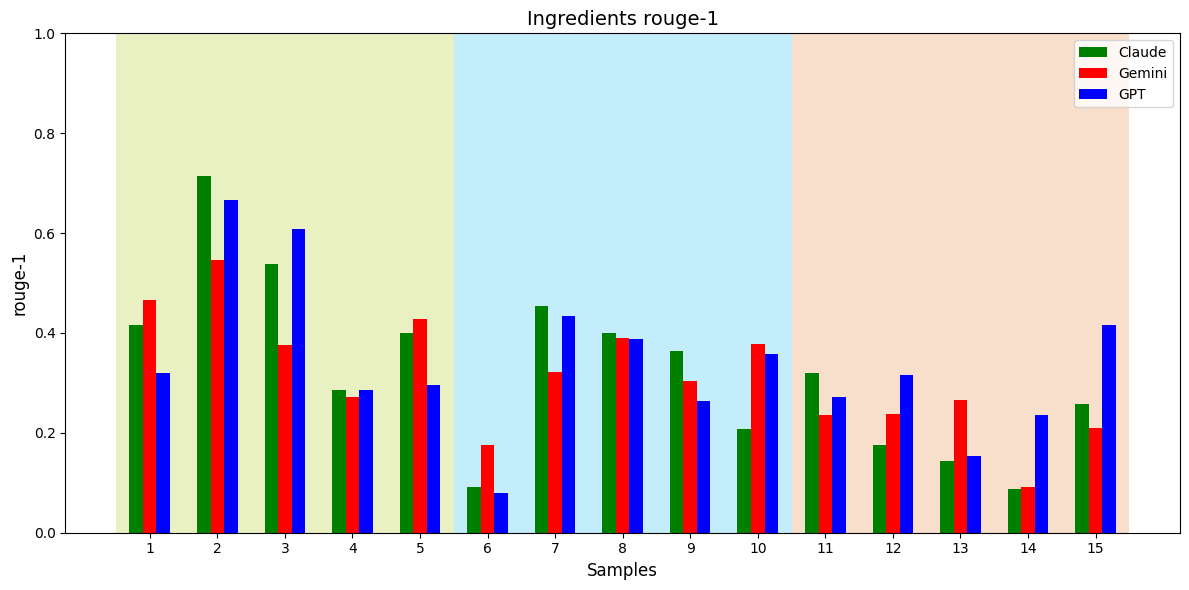

In [9]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)


# 畫長條圖
ax.bar(x3, claude_ing_rouge_1, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_ing_rouge_1, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_ing_rouge_1, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('rouge-1', fontsize=12)
ax.set_title('Ingredients rouge-1', fontsize=14)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('ing_rouge1.png')

plot ROUGE 2

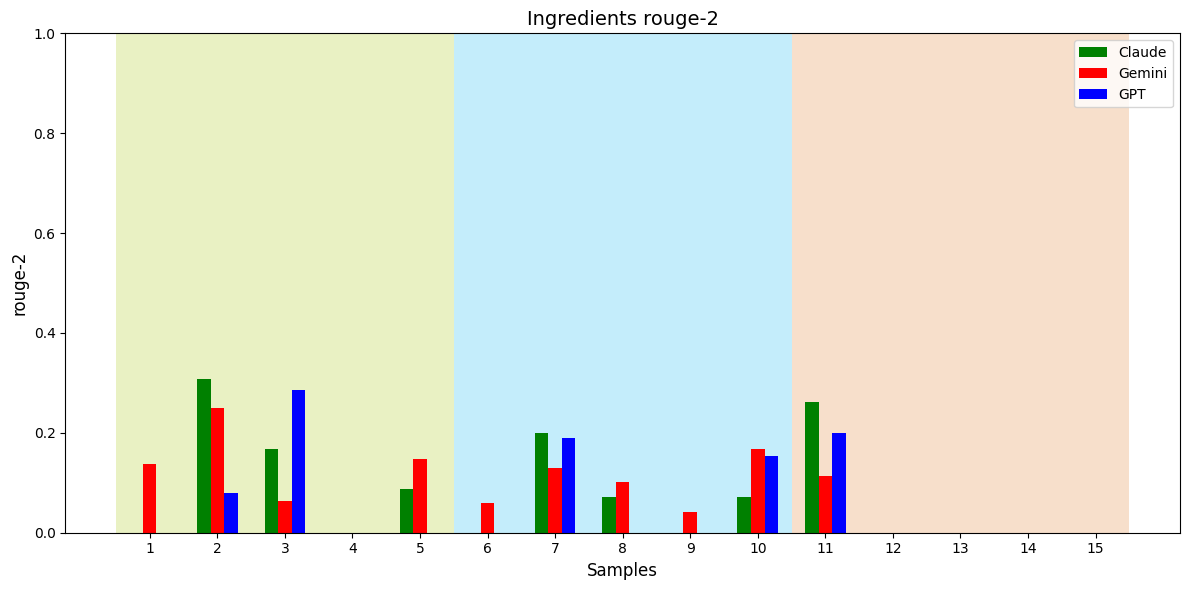

In [10]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)


# 畫長條圖
ax.bar(x3, claude_ing_rouge_2, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_ing_rouge_2, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_ing_rouge_2, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('rouge-2', fontsize=12)
ax.set_title('Ingredients rouge-2', fontsize=14)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('ing_rouge2.png')

plot ROUGE-L

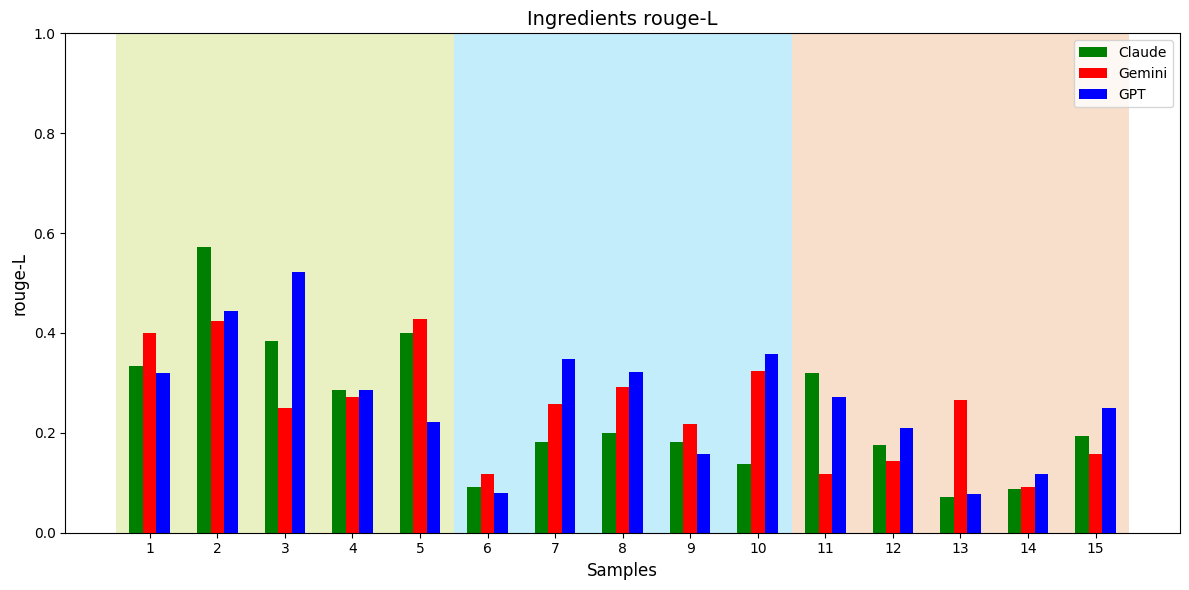

In [11]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)


# 畫長條圖
ax.bar(x3, claude_ing_rouge_L, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_ing_rouge_L, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_ing_rouge_L, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('rouge-L', fontsize=12)
ax.set_title('Ingredients rouge-L', fontsize=14)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('ing_rougeL.png')

## Cooking Instructions

### ROUGE

In [12]:
gpt_instrc_rouge = []
gemini_instrc_rouge = []
claude_instrc_rouge = []

def preprocess_text(text):
    words = jieba.lcut(text)
    processed_text = ' '.join(words)
    return processed_text

def rouge_for_instrc_sentence(gt_instrc_sentence, model_instrc_sentence):
    processed_gt = preprocess_text(gt_instrc_sentence)
    processed_model = preprocess_text(model_instrc_sentence)
    print(processed_gt)
    print(processed_model)
    rouge = Rouge()
    scores = rouge.get_scores(processed_gt, processed_model)
    print(scores)
    return scores
    
def get_instrc_rouge(gt_instrc_sentence_dic, model_instrc_sentence_dic):
    ing_rouge = []
    for gt_id, model_id in zip(gt_instrc_sentence_dic, model_instrc_sentence_dic):
        sentence1 = gt_instrc_sentence_dic[gt_id]
        sentence2 = model_instrc_sentence_dic[model_id]
        print(sentence1)
        print(sentence2)
        ing_rouge.append(rouge_for_instrc_sentence(sentence1, sentence2))
        print(rouge_for_instrc_sentence(sentence1, sentence2))
    return ing_rouge

gpt_instrc_rouge = get_instrc_rouge(gt_instrc_sentence_dic, gpt_instrc_sentence_dic)
gemini_instrc_rouge = get_instrc_rouge(gt_instrc_sentence_dic, gemini_instrc_sentence_dic)
claude_instrc_rouge = get_instrc_rouge(gt_instrc_sentence_dic, claude_instrc_sentence_dic)

print(f'gpt_instrc_rouge = {gpt_instrc_rouge}')
print(f'gemini_instrc_rouge = {gemini_instrc_rouge}')
print(f'claude_instrc_rouge = {claude_instrc_rouge}')

洋蔥切絲或丁。五花肉切細條。大蒜壓成泥或切末。紅蔥頭可以用紅蔥酥代替。先放部分的肉下鍋煎出油來。肉取出備用。將砂糖或冰糖下鍋，用煎肉的油炒至咖啡色。大約深金黃色就可以先熄火了。加入醬油，油膏。加入蒜泥、五香粉、洋蔥與加入紹興酒拌勻同煮，沒有紹興也可以加米酒。加入所有的五花肉拌炒均勻。加入800ml的水。開大火煮滾，改中小火煮兩個小時。
將五花肉切成小丁，紅蔥頭切片、蒜頭拍碎。熱鍋加少許油，爆香紅蔥頭與蒜頭，加入五花肉煎炒至出油上色。加入醬油、米酒、冰糖、白胡椒粉繼續拌炒。加入水後轉中小火燉煮約40分鐘，期間可放入滷蛋一起滷製。完成後將滷肉盛於白飯上，即可享用。
洋蔥切 絲 或 丁 。 五花肉 切細條 。 大蒜 壓成 泥 或 切末 。 紅蔥頭 可以 用紅蔥 酥 代替 。 先放 部分 的 肉 下鍋 煎 出油來 。 肉 取出 備用 。 將 砂糖 或 冰糖 下鍋 ， 用 煎肉 的 油炒 至 咖啡色 。 大約 深金黃色 就 可以 先 熄火 了 。 加入 醬油 ， 油膏 。 加入 蒜泥 、 五香粉 、 洋蔥 與 加入 紹興酒 拌 勻同 煮 ， 沒有紹興 也 可以 加 米酒 。 加入 所有 的 五花肉 拌 炒 均 勻 。 加入 800ml 的 水 。 開 大火 煮 滾 ， 改中 小火 煮 兩個 小時 。
將 五花肉 切 成小丁 ， 紅蔥頭 切片 、 蒜頭 拍碎 。 熱鍋 加少 許油 ， 爆香 紅蔥頭 與 蒜頭 ， 加入 五花肉 煎炒 至 出油 上色 。 加入 醬油 、 米酒 、 冰糖 、 白 胡椒粉 繼續 拌 炒 。 加入 水後轉 中 小火 燉 煮 約 40 分鐘 ， 期間 可 放入 滷 蛋 一起 滷 製 。 完成 後 將 滷 肉 盛 於 白 飯 上 ， 即可 享用 。
[{'rouge-1': {'r': 0.32075471698113206, 'p': 0.2463768115942029, 'f': 0.27868851967616237}, 'rouge-2': {'r': 0.04225352112676056, 'p': 0.030612244897959183, 'f': 0.035502953707503906}, 'rouge-l': {'r': 0.18867924528301888, 'p': 0.14492753623188406, 'f': 0.163

In [13]:
gpt_instrc_rouge_1 = []
gpt_instrc_rouge_2 = []
gpt_instrc_rouge_L = []

for items in gpt_instrc_rouge:
    for item in items:
        print(item)
        gpt_instrc_rouge_1.append(item['rouge-1']['f'])
        gpt_instrc_rouge_2.append(item['rouge-2']['f'])
        gpt_instrc_rouge_L.append(item['rouge-l']['f'])


gemini_instrc_rouge_1 = []
gemini_instrc_rouge_2 = []
gemini_instrc_rouge_L = []

for items in gemini_instrc_rouge:
    for item in items:
        print(item)
        gemini_instrc_rouge_1.append(item['rouge-1']['f'])
        gemini_instrc_rouge_2.append(item['rouge-2']['f'])
        gemini_instrc_rouge_L.append(item['rouge-l']['f'])

claude_instrc_rouge_1 = []
claude_instrc_rouge_2 = []
claude_instrc_rouge_L = []

for items in claude_instrc_rouge:
    for item in items:
        print(item)
        claude_instrc_rouge_1.append(item['rouge-1']['f'])
        claude_instrc_rouge_2.append(item['rouge-2']['f'])
        claude_instrc_rouge_L.append(item['rouge-l']['f'])

print(claude_instrc_rouge_2)

{'rouge-1': {'r': 0.32075471698113206, 'p': 0.2463768115942029, 'f': 0.27868851967616237}, 'rouge-2': {'r': 0.04225352112676056, 'p': 0.030612244897959183, 'f': 0.035502953707503906}, 'rouge-l': {'r': 0.18867924528301888, 'p': 0.14492753623188406, 'f': 0.16393442131550673}}
{'rouge-1': {'r': 0.3125, 'p': 0.20408163265306123, 'f': 0.24691357546715448}, 'rouge-2': {'r': 0.05813953488372093, 'p': 0.03205128205128205, 'f': 0.04132230946793303}, 'rouge-l': {'r': 0.1875, 'p': 0.12244897959183673, 'f': 0.1481481433683891}}
{'rouge-1': {'r': 0.4107142857142857, 'p': 0.17293233082706766, 'f': 0.24338623921614738}, 'rouge-2': {'r': 0.0273972602739726, 'p': 0.009900990099009901, 'f': 0.014545450645686993}, 'rouge-l': {'r': 0.19642857142857142, 'p': 0.08270676691729323, 'f': 0.11640211223202052}}
{'rouge-1': {'r': 0.2, 'p': 0.203125, 'f': 0.20155038259719982}, 'rouge-2': {'r': 0.03488372093023256, 'p': 0.033707865168539325, 'f': 0.034285709287184406}, 'rouge-l': {'r': 0.16923076923076924, 'p': 0.1

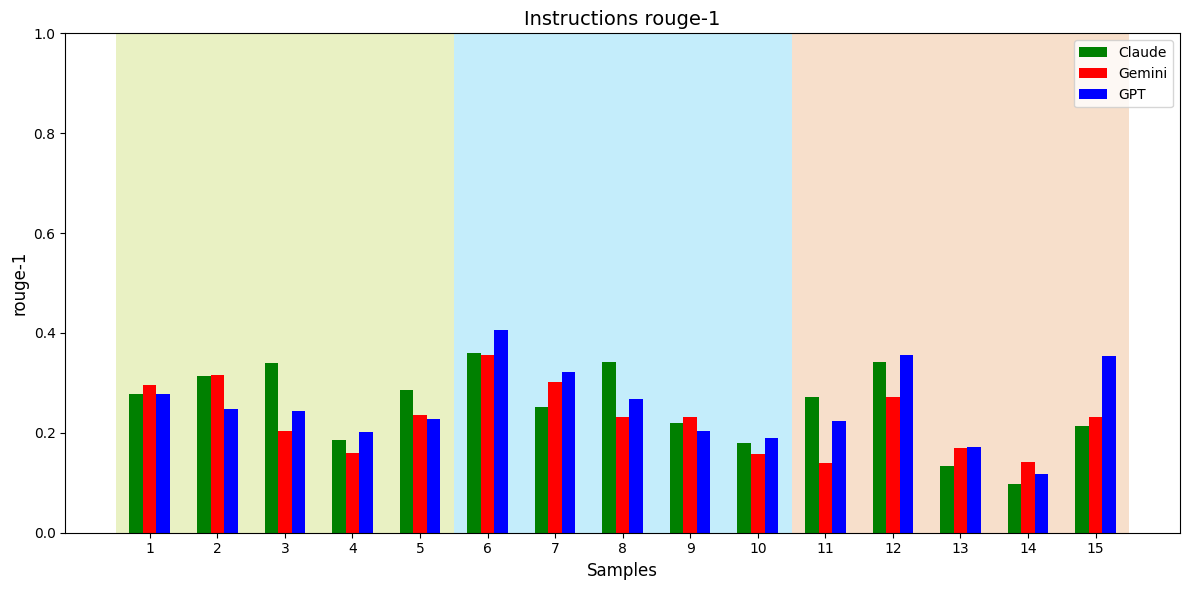

In [14]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)


# 畫長條圖
ax.bar(x3, claude_instrc_rouge_1, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_instrc_rouge_1, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_instrc_rouge_1, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('rouge-1', fontsize=12)
ax.set_title('Instructions rouge-1', fontsize=14)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('instrc_rouge1.png')

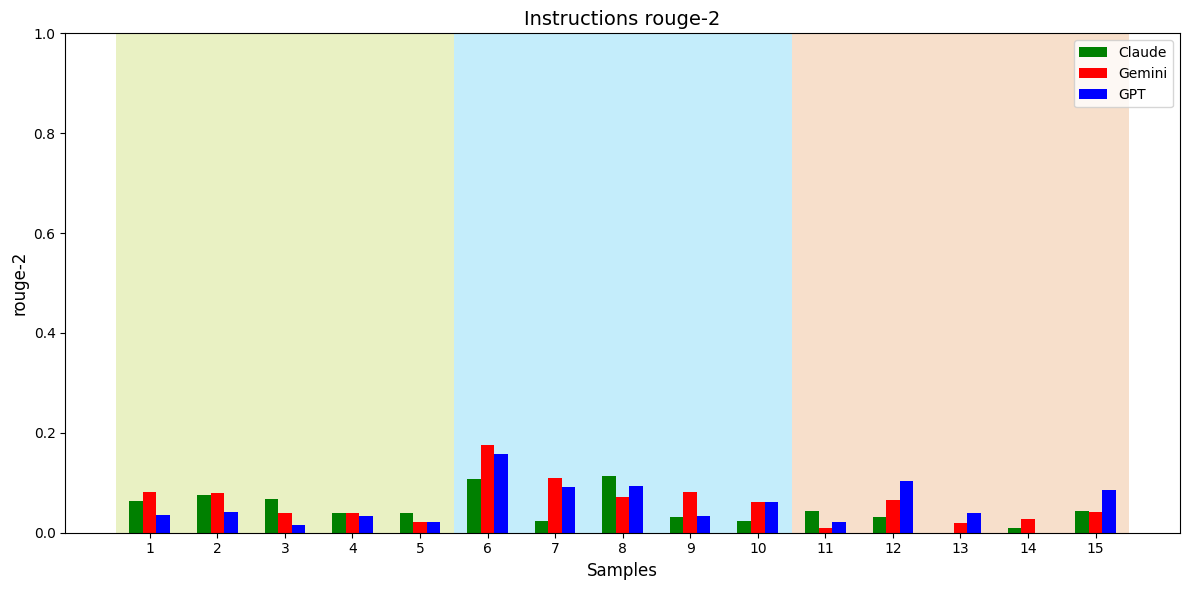

In [15]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)


# 畫長條圖
ax.bar(x3, claude_instrc_rouge_2, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_instrc_rouge_2, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_instrc_rouge_2, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('rouge-2', fontsize=12)
ax.set_title('Instructions rouge-2', fontsize=14)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('instrc_rouge2.png')

0.16393442131550673
0.23943661472227742
0.17721518495353325
0.1481481433683891
0.17543859159809871
0.16243654322347922
0.11640211223202052
0.09708737406494508
0.1964285666043528
0.17054263065921535
0.12389380039783872
0.11999999510755575
0.15151514651629952
0.1323529361775521
0.18181817690251323
0.30769230318744195
0.24864864364996359
0.21857922997641027
0.20967741460978156
0.23021582281662448
0.1889763732506666
0.1785714235969389
0.16528925129704272
0.2393162343779678
0.18978101706430828
0.19047618552825224
0.1232876662929257
0.1333333285333335
0.07843136770472925
0.16260162151893726
0.11940298032523969
0.09722221731867309
0.20987653821063873
0.22222221734320996
0.15714285220816343
0.16438355666729232
0.13157894245498633
0.14379084475030987
0.11851851389410167
0.077922073631304
0.11834319058996555
0.048780483233194956
0.21568626954056144
0.11594202419134657
0.12213739970864188


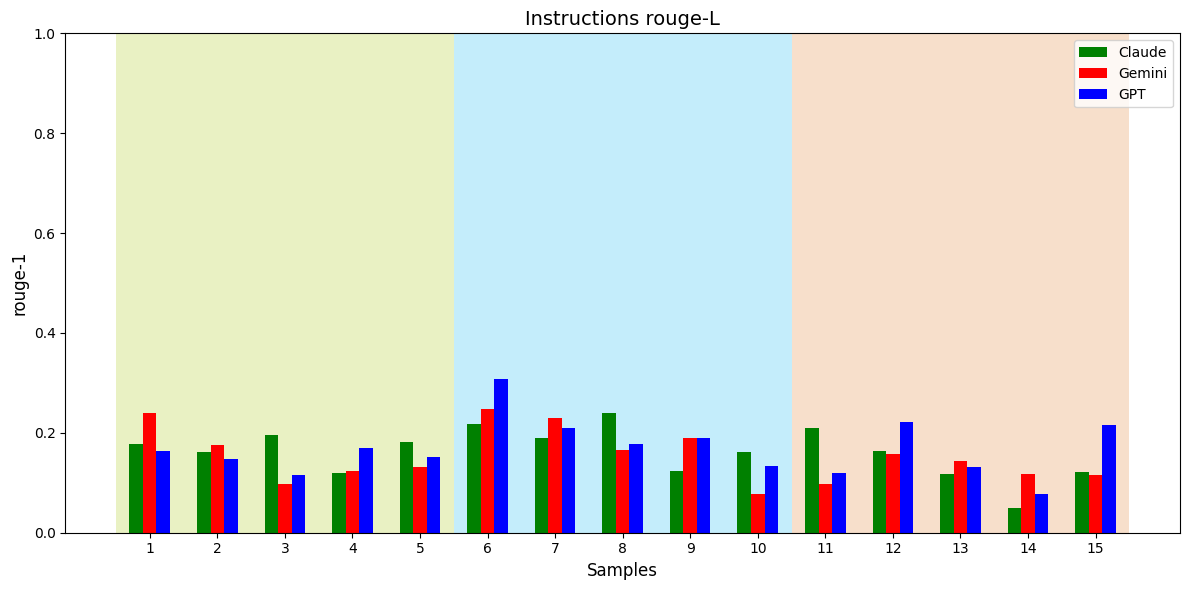

In [17]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)


# 畫長條圖
ax.bar(x3, claude_instrc_rouge_L, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_instrc_rouge_L, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_instrc_rouge_L, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('rouge-1', fontsize=12)
ax.set_title('Instructions rouge-L', fontsize=14)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('instrc_rouge_L.png')

for i in range (len(claude_instrc_rouge_L)):
    print(f'{gpt_instrc_rouge_L[i]}')
    print(f'{gemini_instrc_rouge_L[i]}')
    print(f'{claude_instrc_rouge_L[i]}')